<a href="https://colab.research.google.com/github/sorengod/MasterThesis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot, dates
import datetime as dt
import statsmodels.api as sm


In [ ]:
df = pd.read_parquet('Spot_Prices.parq')
df.to_excel('Spot_Prices_From_Parquet.xlsx')
df = pd.read_excel('Spot_Prices_From_Parquet.xlsx')
df[['HourDK']] = df[['HourDK']].apply(pd.to_datetime)
#df = df.set_index('HourDK')

In [508]:
df = pd.read_excel('Spot_Prices.xlsx')
df[['HourDK']] = df[['HourDK']].apply(pd.to_datetime)

In [509]:
class Time_Series:

    def __init__ (self, df:pd.DataFrame, DateColumn='HourDK'):
        self.DateColumn = 'HourDK'
        self.df = df
        #self.df.set_index('HourDK')

    def extract_date_columns(self):
        #self.df = self.df.set_index(self.DateColumn)
        self.df['Year'] = self.df[self.DateColumn].dt.year
        self.df['Month'] = self.df[self.DateColumn].dt.month
        self.df['Date'] = self.df[self.DateColumn].dt.date
        self.df['Day_Of_Week'] = self.df[self.DateColumn].dt.strftime('%A')
        self.df.set_index('HourDK')
        return self.df
    
    def plot_prices(self, PriceAreas = []):
      self.df = self.df.set_index(self.DateColumn)
      self.df = self.df[:20000]
      for PriceArea in PriceAreas:
        self.df.plot(y=PriceArea, use_index=True, figsize=(25,2), linewidth='.5', color = 'k')
    
    def plot_resample(self, Period:str, PriceAreas = []):
      help_df = self.df
      #help_df = help_df.set_index(self.DateColumn)
      for PriceArea in PriceAreas:
        plot_data = pd.DataFrame(data=help_df, columns = [PriceArea])
        plot_data.resample(Period).mean().plot(y=PriceArea, use_index=True, figsize=(25,2), linewidth='.5', color = 'k')

object = Time_Series(df)

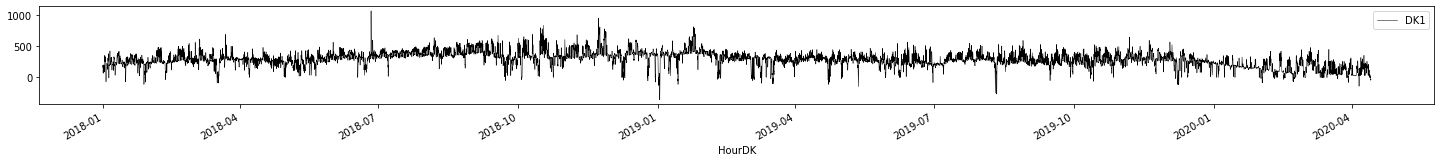

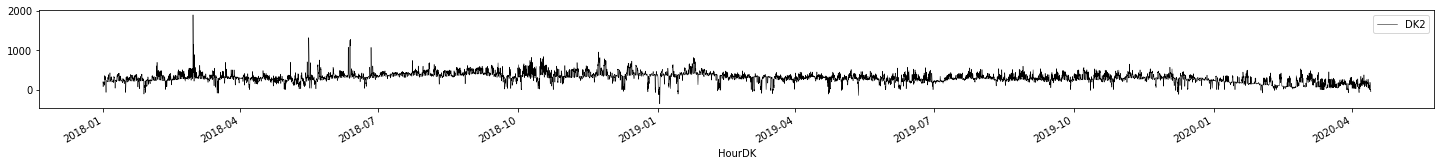

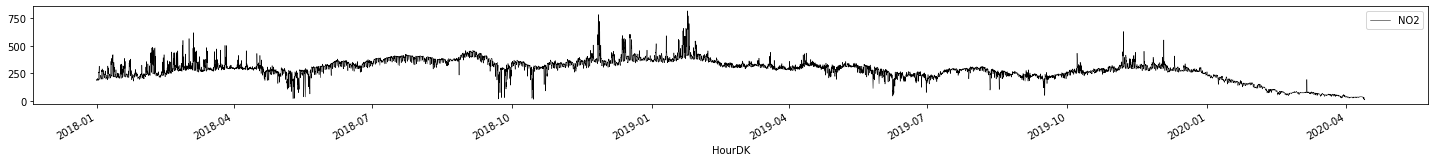

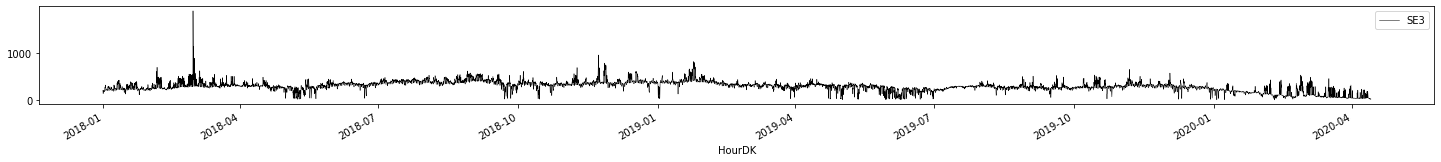

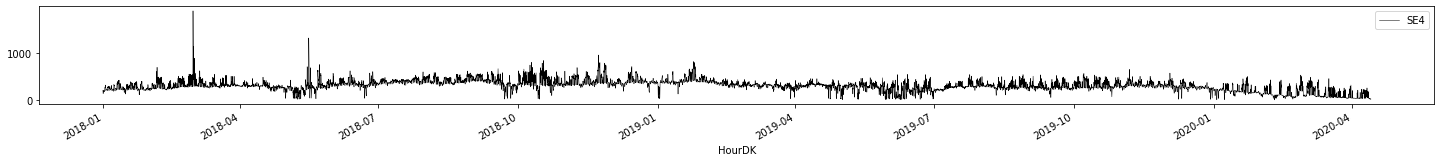

In [510]:
object.plot_prices(['DK1', 'DK2', 'NO2', 'SE3', 'SE4'])

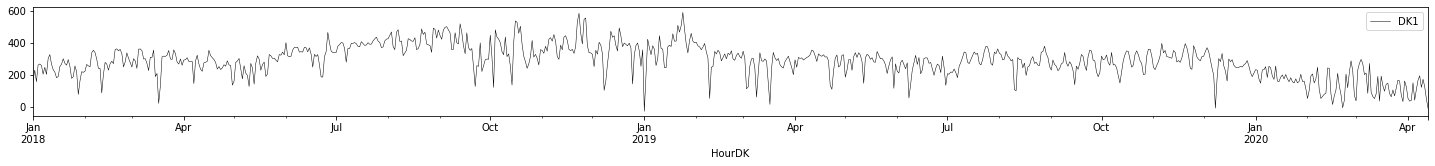

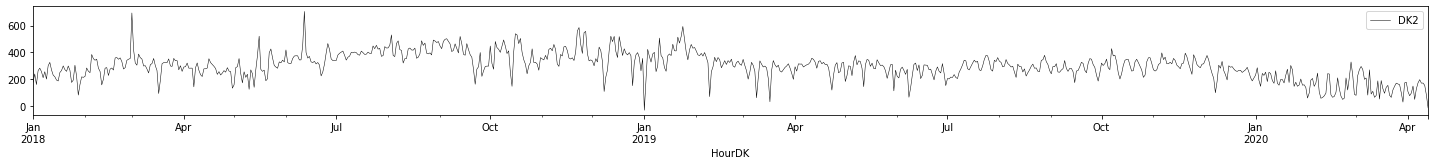

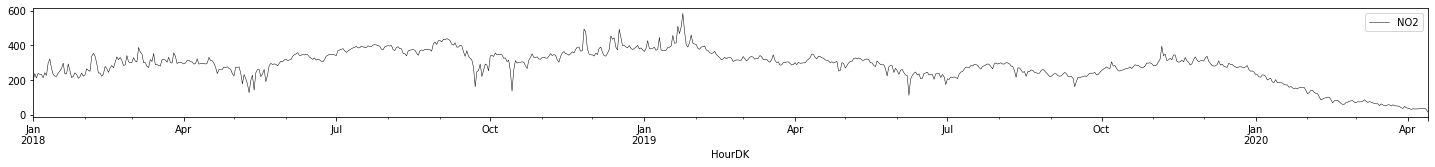

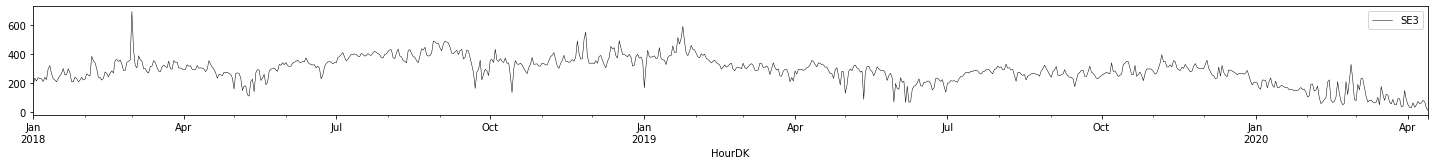

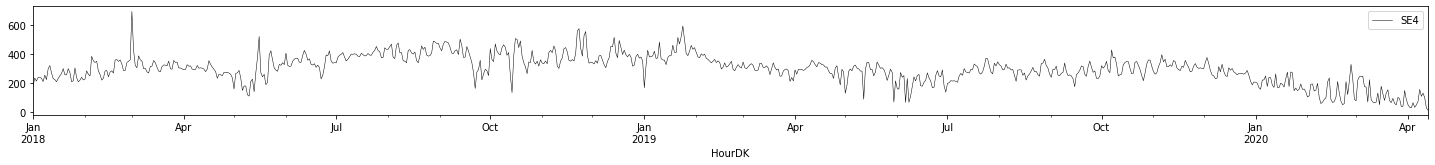

In [511]:
object.plot_resample('1D', ['DK1', 'DK2', 'NO2', 'SE3', 'SE4'])

In [ ]:
help_df = df[['HourDK', 'DK2']]
help_df.set_index('HourDK', inplace=True)

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2022-12-31 14:00:00', '2022-12-31 15:00:00',
               '2022-12-31 16:00:00', '2022-12-31 17:00:00',
               '2022-12-31 18:00:00', '2022-12-31 19:00:00',
               '2022-12-31 20:00:00', '2022-12-31 21:00:00',
               '2022-12-31 22:00:00', '2022-12-31 23:00:00'],
              dtype='datetime64[ns]', name='HourDK', length=43819, freq=None)

In [ ]:
dates = help_df.index
prices = help_df.values.tolist()
df = pd.Series(prices, index=dates)

# Group prices by hour
grouped = df.groupby(df.index.hour).apply(list)

print(grouped)

HourDK
0     [[196.0], [134.880005], [134.809998], [201.360...
1     [[196.740005], [111.580002], [10.27], [199.350...
2     [[194.289993], [132.429993], [0.15], [197.0399...
3     [[183.860001], [182.449997], [-44.59], [197.19...
4     [[184.160004], [132.649994], [-68.559998], [19...
5     [[134.059998], [199.789993], [-34.540001], [20...
6     [[75.779999], [206.940002], [137.779999], [208...
7     [[132.5], [312.049988], [215.5], [226.520004],...
8     [[147.089996], [356.940002], [217.360001], [30...
9     [[154.309998], [283.019989], [217.949997], [31...
10    [[184.309998], [260.829987], [219.0], [279.519...
11    [[191.160004], [262.170013], [217.729996], [26...
12    [[148.800003], [257.26001], [217.580002], [264...
13    [[186.169998], [253.839996], [219.520004], [26...
14    [[192.130005], [267.829987], [222.270004], [26...
15    [[196.970001], [283.23999], [227.110001], [312...
16    [[201.210007], [310.190002], [233.210007], [31...
17    [[204.190002], [315.549988], [235.1

In [ ]:
DK1_Prices.index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2022-12-31 14:00:00', '2022-12-31 15:00:00',
               '2022-12-31 16:00:00', '2022-12-31 17:00:00',
               '2022-12-31 18:00:00', '2022-12-31 19:00:00',
               '2022-12-31 20:00:00', '2022-12-31 21:00:00',
               '2022-12-31 22:00:00', '2022-12-31 23:00:00'],
              dtype='datetime64[ns]', name='HourDK', length=17518, freq=None)

In [ ]:
print(grouped)

HourDK
0     [[196.0], [134.880005], [134.809998], [201.360...
1     [[196.740005], [111.580002], [10.27], [199.350...
2     [[194.289993], [132.429993], [0.15], [197.0399...
3     [[183.860001], [182.449997], [-44.59], [197.19...
4     [[184.160004], [132.649994], [-68.559998], [19...
5     [[134.059998], [199.789993], [-34.540001], [20...
6     [[75.779999], [206.940002], [137.779999], [208...
7     [[132.5], [312.049988], [215.5], [226.520004],...
8     [[147.089996], [356.940002], [217.360001], [30...
9     [[154.309998], [283.019989], [217.949997], [31...
10    [[184.309998], [260.829987], [219.0], [279.519...
11    [[191.160004], [262.170013], [217.729996], [26...
12    [[148.800003], [257.26001], [217.580002], [264...
13    [[186.169998], [253.839996], [219.520004], [26...
14    [[192.130005], [267.829987], [222.270004], [26...
15    [[196.970001], [283.23999], [227.110001], [312...
16    [[201.210007], [310.190002], [233.210007], [31...
17    [[204.190002], [315.549988], [235.1

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

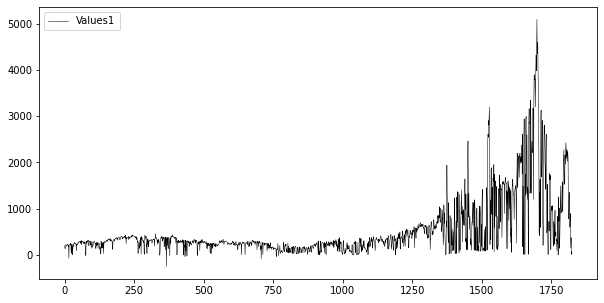

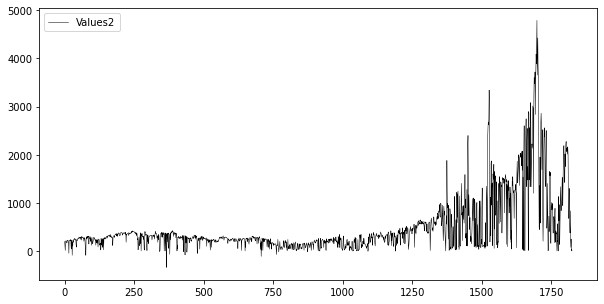

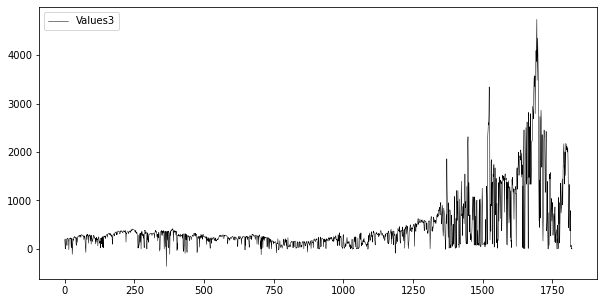

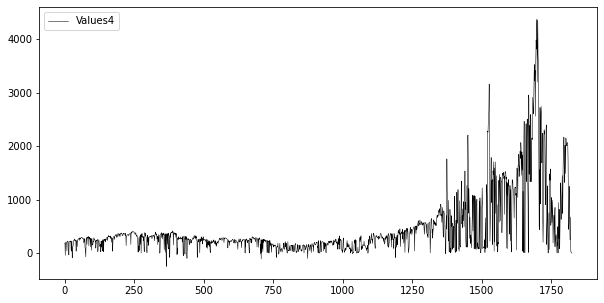

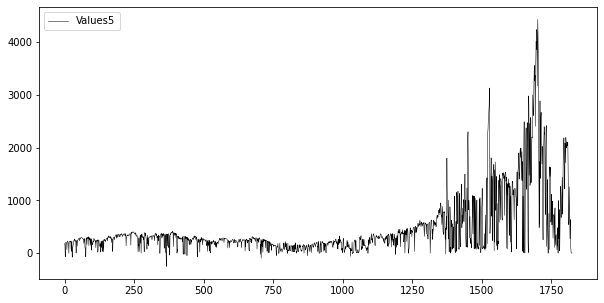

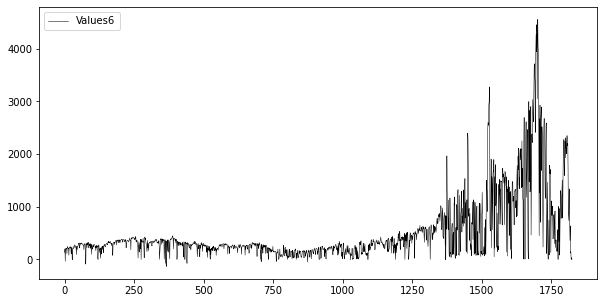

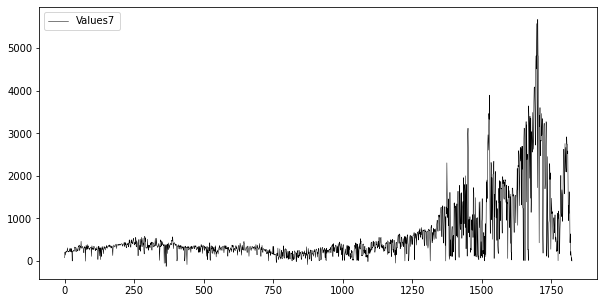

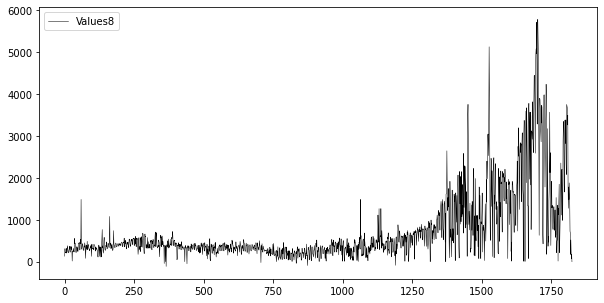

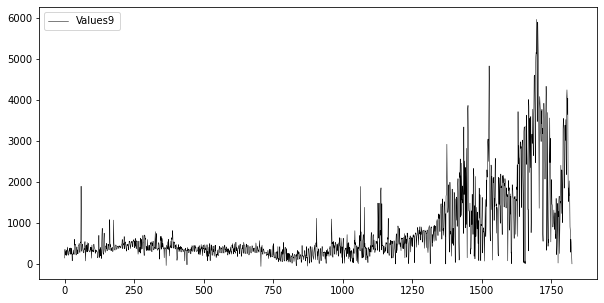

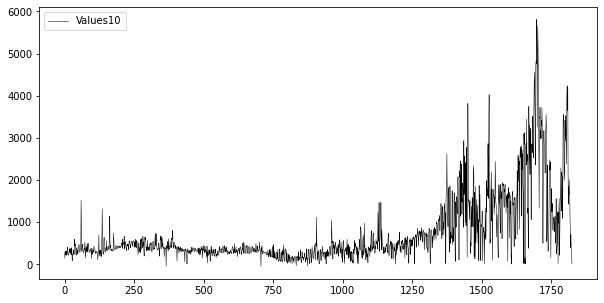

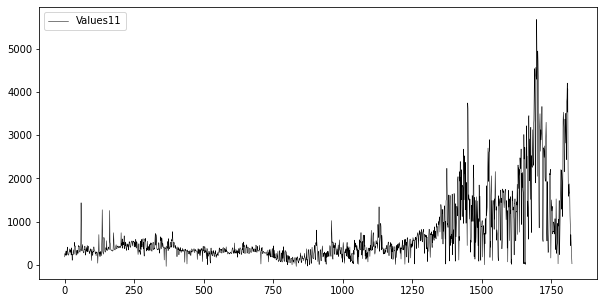

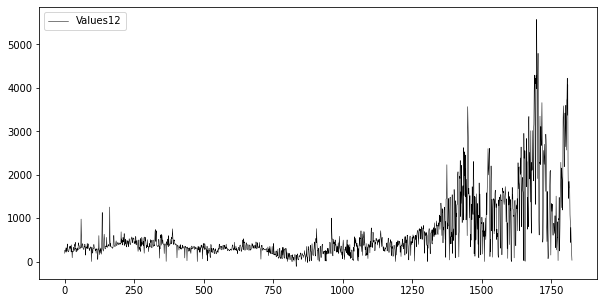

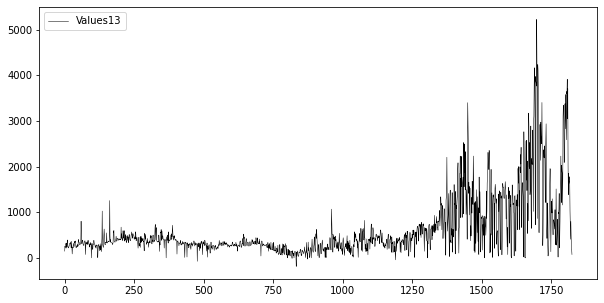

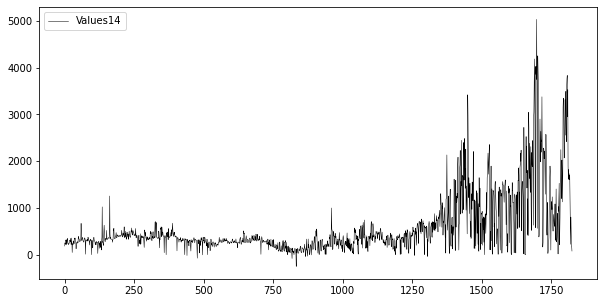

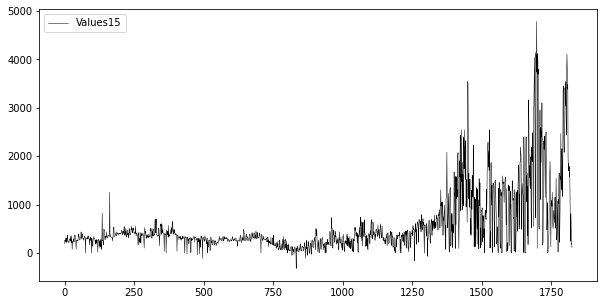

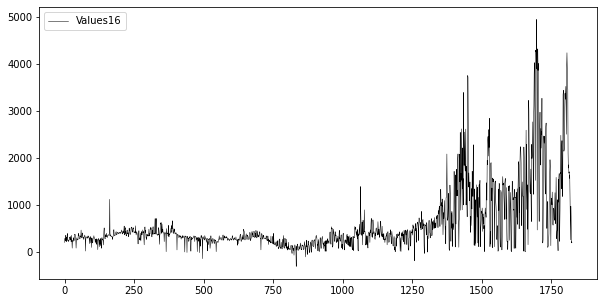

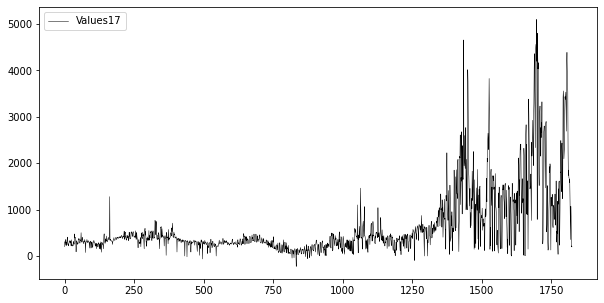

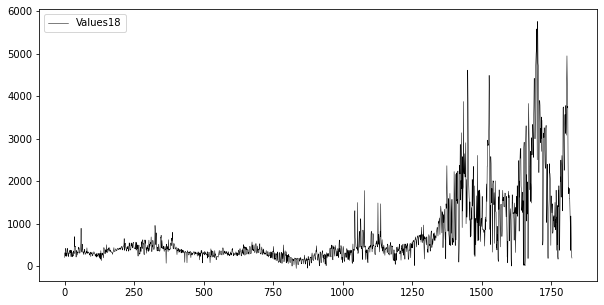

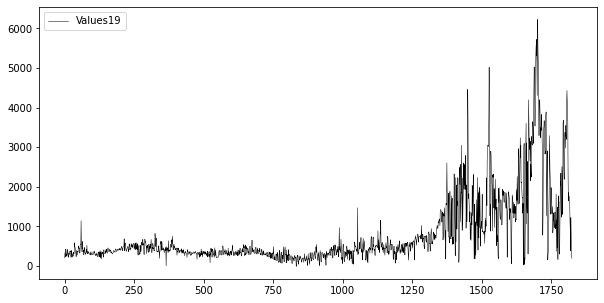

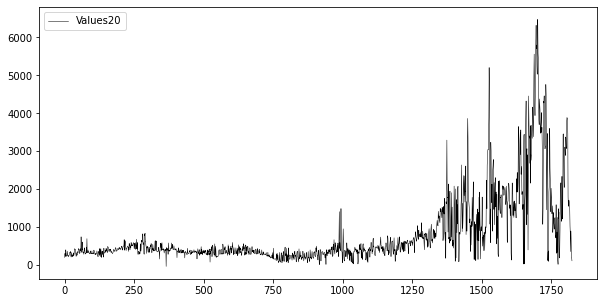

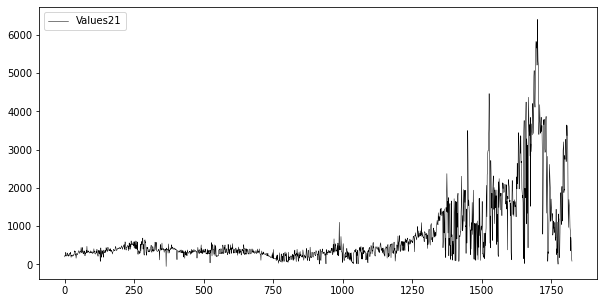

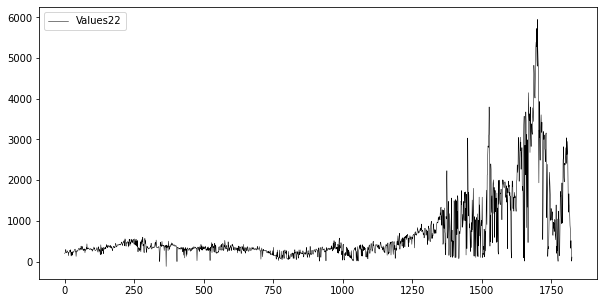

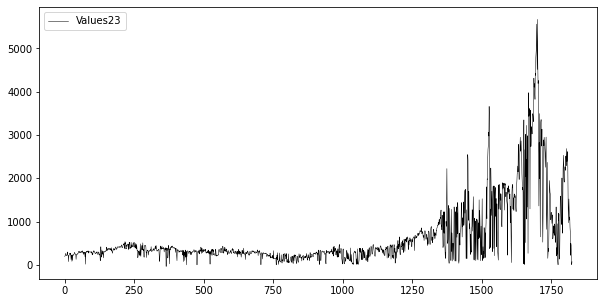

In [ ]:
series = pd.DataFrame(grouped[0])
series.columns = ['Values1']
series.plot(y='Values1', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[1])
series.columns = ['Values2']
series.plot(y='Values2', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[2])
series.columns = ['Values3']
series.plot(y='Values3', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[3])
series.columns = ['Values4']
series.plot(y='Values4', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[4])
series.columns = ['Values5']
series.plot(y='Values5', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[5])
series.columns = ['Values6']
series.plot(y='Values6', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[6])
series.columns = ['Values7']
series.plot(y='Values7', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[7])
series.columns = ['Values8']
series.plot(y='Values8', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[8])
series.columns = ['Values9']
series.plot(y='Values9', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[9])
series.columns = ['Values10']
series.plot(y='Values10', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[10])
series.columns = ['Values11']
series.plot(y='Values11', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[11])
series.columns = ['Values12']
series.plot(y='Values12', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[12])
series.columns = ['Values13']
series.plot(y='Values13', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[13])
series.columns = ['Values14']
series.plot(y='Values14', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[14])
series.columns = ['Values15']
series.plot(y='Values15', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[15])
series.columns = ['Values16']
series.plot(y='Values16', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[16])
series.columns = ['Values17']
series.plot(y='Values17', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[17])
series.columns = ['Values18']
series.plot(y='Values18', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[18])
series.columns = ['Values19']
series.plot(y='Values19', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[19])
series.columns = ['Values20']
series.plot(y='Values20', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[20])
series.columns = ['Values21']
series.plot(y='Values21', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[21])
series.columns = ['Values22']
series.plot(y='Values22', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[22])
series.columns = ['Values23']
series.plot(y='Values23', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')


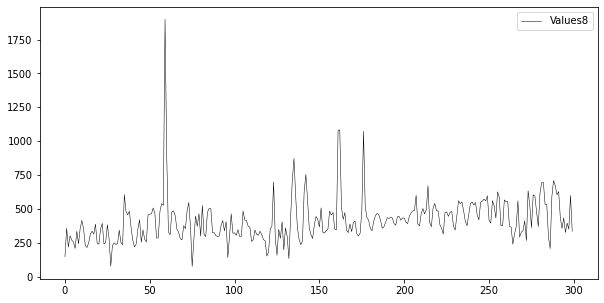

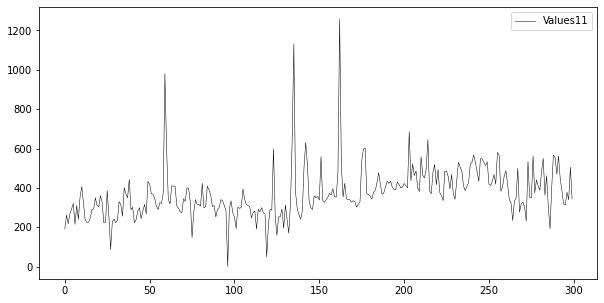

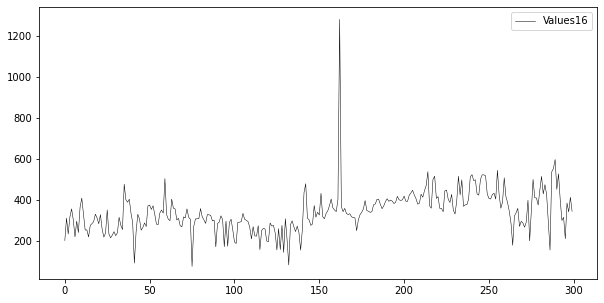

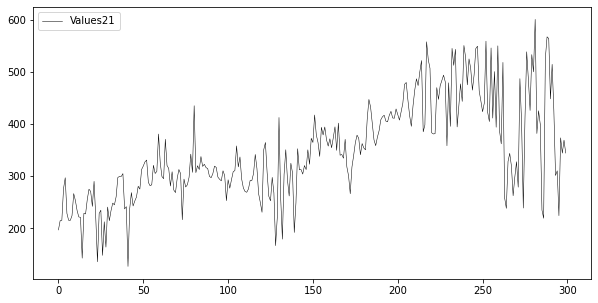

In [487]:
series = pd.DataFrame(grouped[8][:300])
series.columns = ['Values8']
series.plot(y='Values8', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[11][:300])
series.columns = ['Values11']
series.plot(y='Values11', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[16][:300])
series.columns = ['Values16']
series.plot(y='Values16', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[21][:300])
series.columns = ['Values21']
series.plot(y='Values21', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')